# W07 - Class Assignment

Evelin Alim Natadjaja / 0706022310021

## Import Libraries

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns

## Data Understanding, Cleaning, Visualizations

### Load and check data

In [128]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [129]:
df.shape

(200, 5)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [131]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [132]:
df.duplicated().sum()

np.int64(0)

In [133]:
df = df.rename(columns={"Annual Income (k$)": "Annual Income"})
df = df.rename(columns={"Spending Score (1-100)": "Spending Score"})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


From this info, we could know that the data has 5 column with 1 identifier, 1 categorical, and 3 numerical columnn. This data has 200 record and there are no missing value and no duplicated row

### Visualizations

/tmp/ipython-input-185028369.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Spending Score", data=df, palette="Set2")


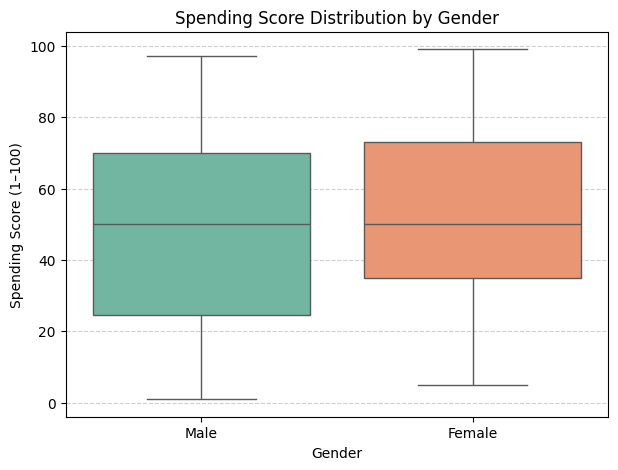

In [134]:
#Boxplot visualisation of gender and spending score
plt.figure(figsize=(7,5))
sns.boxplot(x="Gender", y="Spending Score", data=df, palette="Set2")
plt.title("Spending Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Spending Score (1–100)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

From this plot, it shows that Female has a smaller spending score IQR. However, the median of both gender is almost the same

<Axes: >

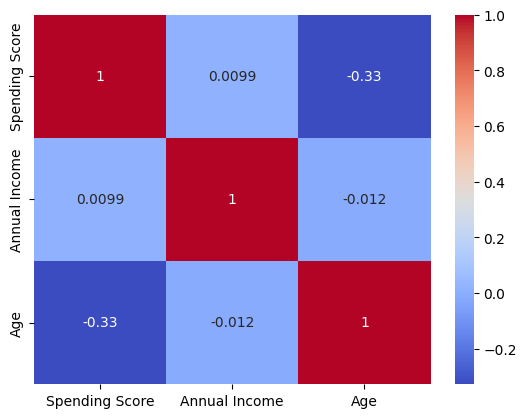

In [135]:
#Correlation heatmap between numerical values
sns.heatmap(df[['Spending Score','Annual Income','Age']].corr(), annot=True, cmap="coolwarm")

The heatmap shows the correlation between numerical features and here it shows that age and spending score has a the highest correlation than other variables

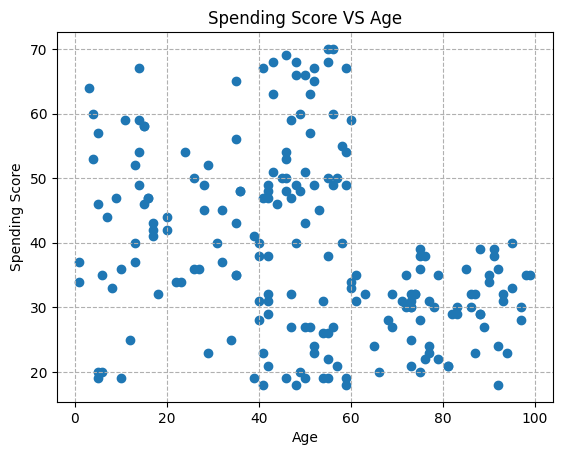

In [136]:
# Scatter plot for Age and Spending Score
plt.scatter(df['Spending Score'], df['Age'])
plt.title('Spending Score VS Age')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.grid(axis='both', linestyle='--')
plt.show()

Based on the heatmap, i decided to create scatter plot for Age and Spending Score.

In [137]:
#Drop the customer ID
df = df[['Age', 'Gender', 'Spending Score','Annual Income']]
df.head()

,Age,Gender,Spending Score,Annual Income
0,19,Male,39,15
1,21,Male,81,15
2,20,Female,6,16
3,23,Female,77,16
4,31,Female,40,17


## Data Transformation

### Encoding

In [138]:
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder

one_hot_map = {
    'Gender': {'Female': 0, 'Male': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

### Scaling

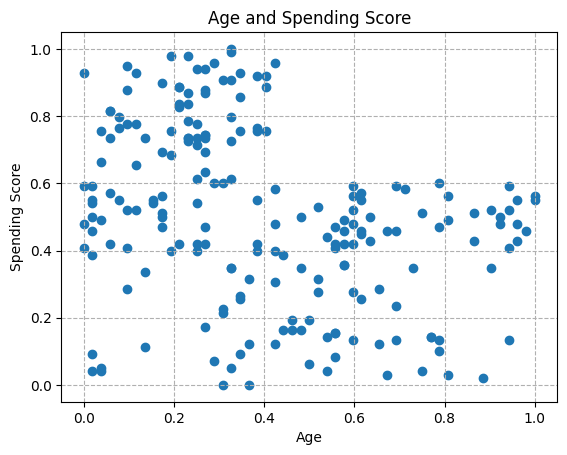

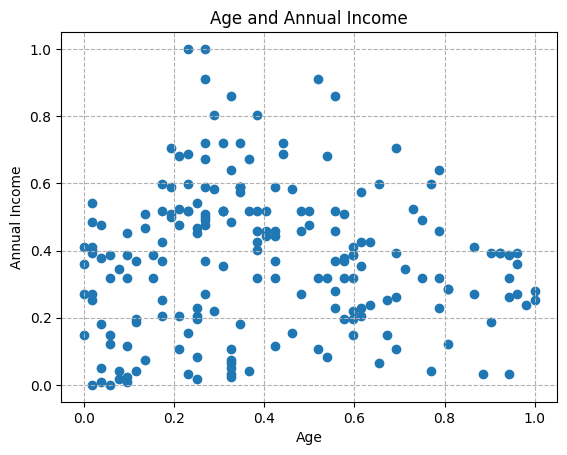

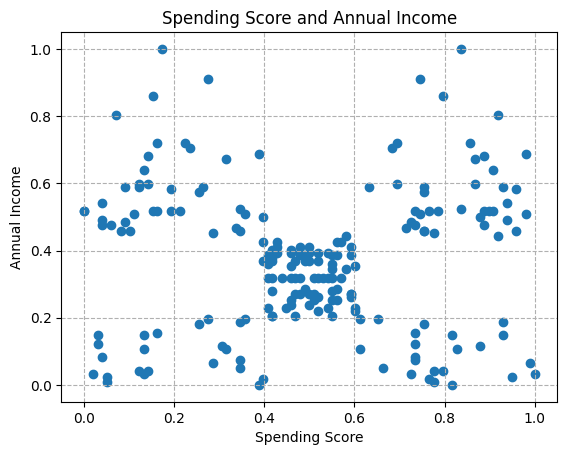

In [139]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_minmax_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=['Age','Gender','Spending Score','Annual Income'])

df_minmax_scaled.head()

# visualization
plt.scatter(df_minmax_scaled['Age'], df_minmax_scaled['Spending Score'])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Spending Score")
plt.show()

plt.scatter(df_minmax_scaled['Age'], df_minmax_scaled['Annual Income'])
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Annual Income")
plt.show()

plt.scatter(df_minmax_scaled['Spending Score'], df_minmax_scaled['Annual Income'])
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.grid(axis='both', linestyle='--')
plt.title("Spending Score and Annual Income")
plt.show()

Scaling is needed to reduce the distance between min and max value because it has a large impact to the algorithm which is distance-based like K-Means when comparing data points

### Elbow Method

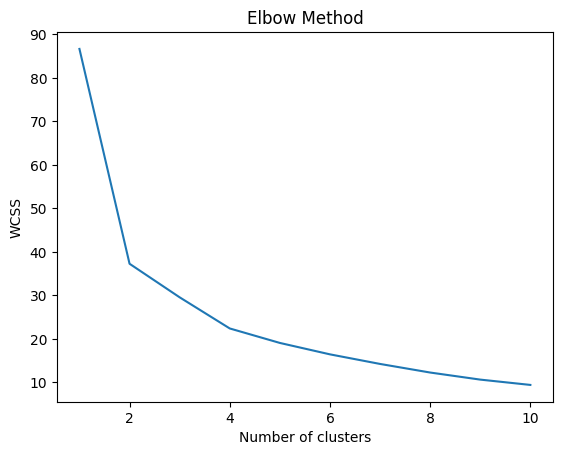

In [140]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_minmax_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [141]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters       WCSS
0                   1  86.681482
1                   2  37.272272
2                   3  29.552858
3                   4  22.390960
4                   5  19.060907
5                   6  16.434553
6                   7  14.229306
7                   8  12.253159
8                   9  10.625832
9                  10   9.403891


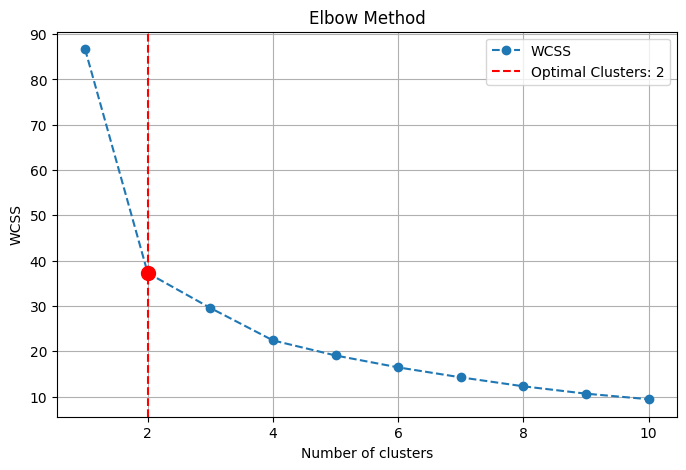

The optimal number of clusters is: 2


In [142]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

Based on the Elbow Method and subsequent K-Means clustering analysis, the optimal number of clusters for this dataset is K = 2. The WCSS shows a drastic changes at K = 2. This indicates that the mall customers can be meaningfully segmented into two distinct groups.

## Modeling with K-Means

In [143]:
# Fit K-Means to the data with the optimal number of K cluster = 2
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_minmax_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Age,Gender,Spending Score,Annual Income,KMeans_Cluster
0,19,Male,39,15,0
1,21,Male,81,15,0
2,20,Female,6,16,1
3,23,Female,77,16,1
4,31,Female,40,17,1


/tmp/ipython-input-3326085320.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x = "Age", y = "Spending Score", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_minmax_scaled, s = 60)


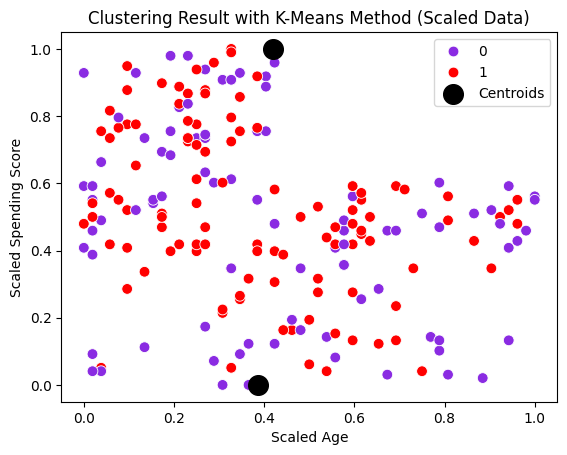

/tmp/ipython-input-3326085320.py:10: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x = "Age", y = "Annual Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_minmax_scaled, s = 60)


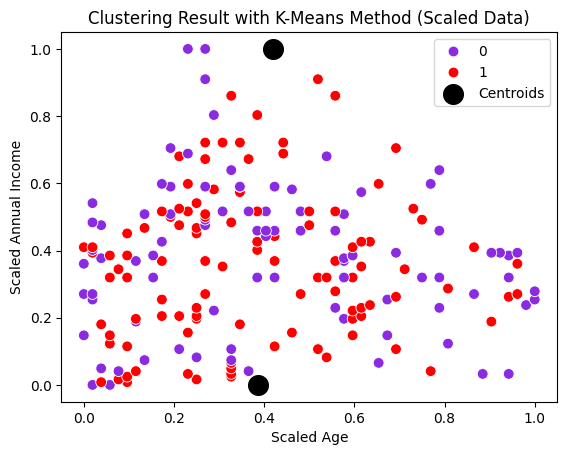

/tmp/ipython-input-3326085320.py:18: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x = "Spending Score", y = "Annual Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_minmax_scaled, s = 60)


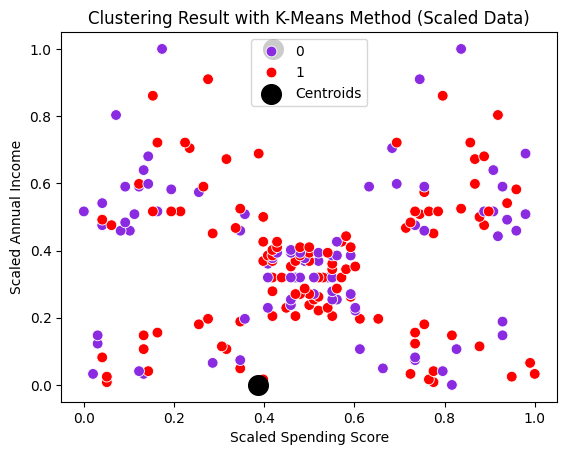

In [144]:
# visualize the result using scater chart on scaled data
sns.scatterplot(x = "Age", y = "Spending Score", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_minmax_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

sns.scatterplot(x = "Age", y = "Annual Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_minmax_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Annual Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

sns.scatterplot(x = "Spending Score", y = "Annual Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_minmax_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Spending Score")
plt.ylabel("Scaled Annual Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

## Cluster Profiling & Insights

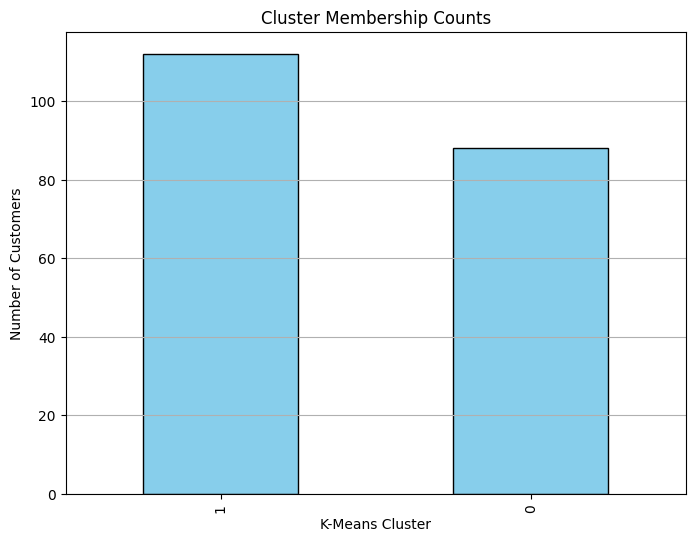

In [145]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [149]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(clusters).agg({'Age': ['mean', 'min', 'max'],
                                            'Gender' : lambda x: x.mode()[0],
                                            'Annual Income': ['mean', 'min', 'max'],
                                            'Spending Score': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Age           Gender Annual Income           \
                     mean min max <lambda>          mean min  max   
KMeans_cluster                                                      
0               39.806818  18  70     Male     62.227273  15  137   
1               38.098214  18  68   Female     59.250000  16  126   

               Spending Score          
                         mean min max  
KMeans_cluster                         
0                   48.511364   1  97  
1                   51.526786   5  99

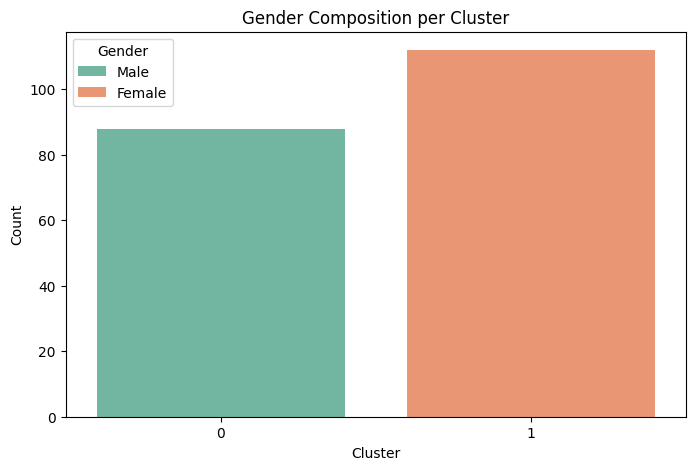

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='KMeans_Cluster', hue='Gender', data=df, palette='Set2')
plt.title("Gender Composition per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.show()

## Managerial Implications

**Cluster 0 = Middle-Aged / Moderate Income Consumers (More Male)**

1. **Profile:**
* Average age: ~40 years old.
* Average annual income: around $62K (moderate income).
* Average spending score: ~48, indicating balanced spending — neither highly frugal nor extravagant.
* Gender distribution: slightly more males than females.

2. **Interpretation:**
This segment represents practical, working-age consumers who have stable incomes but maintain moderate spending habits. They tend to be budget-conscious, prioritizing value over luxury.

3. **Implications:**
* Focus marketing on functional and value-for-money products.
* Highlight durability, practicality, and efficiency.
* Suitable offers: loyalty discounts, bundled deals, or mid-tier services.
* Marketing channels: email campaigns or workplace promotions, appealing to their stability and practicality.

**Cluster 1 = Slightly Younger / Moderate Income Consumers (More Female)**

1. **Profile:**
* Average age: ~38 years old.
* Average annual income: around $59K — slightly lower than Cluster 0.
* Average spending score: ~52, indicating higher spending enthusiasm.
* Gender distribution: more females than males.

2. **Interpretation:**
This group represents socially active, experience-oriented consumers who are more willing to spend, particularly on lifestyle, beauty, and leisure products.

3. **Implications:**
* Focus marketing on aesthetic, experiential, and trend-driven products.
* Highlight self-care, enjoyment, and emotional appeal.
* Suitable offers: loyalty rewards, seasonal sales, influencer-driven campaigns.
* Marketing channels: social media and lifestyle platforms targeting female audiences.